# Lab 4: BayesianModels

#### Implement Naïve Bayesian classification using scikit-learn.
#### Apply Bayesian Decision Theory to make predictions.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
digits = load_digits()  # Load the digits dataset
X = digits.data  # Features
y = digits.target  # Target labels

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [5]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [6]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8472


In [7]:
def bayes_decision_theory(model, X_test, y_train):

  y_pred = []
  class_labels = model.classes_

  # Estimate prior probabilities
  class_priors = np.bincount(y_train) / len(y_train)

  for x in X_test:

    # Calculate posterior probability for each class
    posteriors = []
    for label in class_labels:

      # Get likelihood for the class
      likelihood = model.predict_proba([x])[0][model.classes_ == label]
      posterior = likelihood * class_priors[label]
      posteriors.append(posterior)

    # Predict class with highest posterior probability
    predicted_class = class_labels[np.argmax(posteriors)]
    y_pred.append(predicted_class)

  return y_pred

In [8]:
# Apply Bayesian Decision Theory
y_pred_bayes = bayes_decision_theory(clf, X_test, y_train)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Bayesian Decision Theory Accuracy: {accuracy_bayes:.4f}")

Bayesian Decision Theory Accuracy: 0.8472


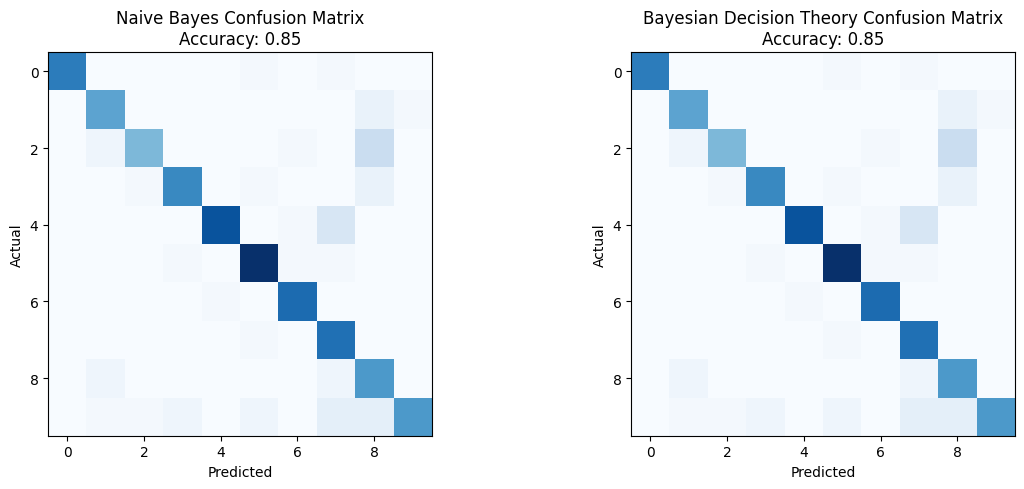

In [9]:
# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred)
ax1.imshow(cm_nb, cmap='Blues')
ax1.set_title(f"Naive Bayes Confusion Matrix\nAccuracy: {accuracy:.2f}")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")

# Confusion matrix for Bayesian Decision Theory
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
ax2.imshow(cm_bayes, cmap='Blues')
ax2.set_title(f"Bayesian Decision Theory Confusion Matrix\nAccuracy: {accuracy_bayes:.2f}")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")

plt.tight_layout()
plt.show()